# Load the data from the HanBitmap directory

In [1]:
import os
import torch

import numpy as np
import torchvision.transforms as transforms

from PIL import Image


# Load the data from the HanBitmap files

In [2]:
def loadXy(data_dir):
    dir_list = os.listdir(data_dir)
    X_data = {}
    y_data = {}
    for f in dir_list:
        han_char = f.split("_")[0]
        if f.endswith("_X"):
            Xs = open(f"{data_dir}/{f}", "rb").readlines()
            X_data[han_char] = [np.frombuffer(X, dtype=bool)[:-1].reshape(32, 32) for X in Xs]
        if f.endswith("_y"):
            y = open(f"{data_dir}/{f}", "r").readlines()
            y_data[han_char] = [float(a) for a in y]
    return X_data, y_data

def displayBinary(arr):
    img = Image.fromarray(arr)
    return img

In [3]:
X_data, y_data = loadXy("HanBitmap")

# Display the visual reditions of a little of the data

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False  True ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


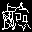

In [4]:
print(X_data["9E7C"][1])
displayBinary(X_data["9E7C"][1])

# Check for duplicates that have been processed in the data

In [5]:
def dupeCheck(out_dir="./HanBitmap", files=()):
    """
    Checks the given files in the output directory for duplicates
    If no files are specified, all files in the directory, both X and y, will be checked
    """
    if len(files) == 0:
        files = os.listdir(out_dir)
    for f in files:
        if f.endswith("_X"):
            han_char = f.split("_")[0]
            # check for duplicates
            fX = open(f"{out_dir}/{han_char}_X", "rb")
            fX_orig = np.array(fX.readlines())
            uniques, u_filter = np.unique(fX_orig, return_index=True, axis=0)
            if len(fX_orig) == len(uniques):
                fX.close()
            else:
                fX_orig = fX_orig[u_filter]
                fX_str = b""
                for s in fX_orig:
                    fX_str += s
                fX.close()
                print(fX_str)
                fX = open(f"{out_dir}/{han_char}_X", "wb")
                fX.write(fX_str)
                fX.close()
                # only open fy if we made changes to fX
                fy = open(f"{out_dir}/{han_char}_y", "r")
                fy_new = np.array(fy.readlines())[u_filter]
                fy_str = ""
                for s in fy_new:
                    fy_str += s
                fy.close()
                print(fy_str)
                fy = open(f"{out_dir}/{han_char}_y", "w")
                fy.write(fy_str)
                fy.close()


In [6]:
dupeCheck()

In [7]:
def buildDataset(X, y):
    """
    Transforms X, y data in Python list form to an acceptable format for neural networks
    """
    X = torch.tensor(np.array(X), dtype=torch.bool)
    y = torch.tensor(y)
    return X, y
    

In [8]:
for hanchar in X_data:
    print(f"Creating dataset for {hanchar}")
    print(buildDataset(X_data[hanchar], y_data[hanchar]))
    

Creating dataset for 5E7E
(tensor([[[False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         ...,
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False]],

        [[False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False,  True, False],
         ...,
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False]],

        [[False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         ...,
         [False, False, False,  ..., False